In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import statsmodels.formula.api as smf
from pandas.plotting import lag_plot
from statsmodels.graphics.tsaplots import plot_acf 

In [2]:
air = pd.read_excel('E:DATA SETS/Airlines+Data.xlsx')

In [3]:
air

,Month,Passengers
0,1995-01-01,112
1,1995-02-01,118
2,1995-03-01,132
3,1995-04-01,129
4,1995-05-01,121
...,...,...
91,2002-08-01,405
92,2002-09-01,355
93,2002-10-01,306
94,2002-11-01,271


In [4]:
air.shape

(96, 2)

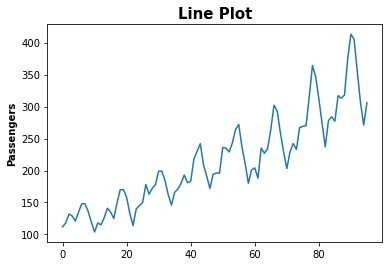

In [5]:
# Visualizing the overall data in order to the components present in our data
plt.title("Line Plot", size = 15, weight = 'bold')
plt.ylabel("Passengers", size = 10, weight = 'bold')
plt.plot(air['Passengers'])

In [6]:
air["t"] = np.arange(1,97)
air["t_squared"] = air["t"]*air["t"]
air.columns
air["log_Passengers"] = np.log(air["Passengers"])

In [7]:
air

,Month,Passengers,t,t_squared,log_Passengers
0,1995-01-01,112,1,1,4.718499
1,1995-02-01,118,2,4,4.770685
2,1995-03-01,132,3,9,4.882802
3,1995-04-01,129,4,16,4.859812
4,1995-05-01,121,5,25,4.795791
...,...,...,...,...,...
91,2002-08-01,405,92,8464,6.003887
92,2002-09-01,355,93,8649,5.872118
93,2002-10-01,306,94,8836,5.723585
94,2002-11-01,271,95,9025,5.602119


In [8]:
air

,Month,Passengers,t,t_squared,log_Passengers
0,1995-01-01,112,1,1,4.718499
1,1995-02-01,118,2,4,4.770685
2,1995-03-01,132,3,9,4.882802
3,1995-04-01,129,4,16,4.859812
4,1995-05-01,121,5,25,4.795791
...,...,...,...,...,...
91,2002-08-01,405,92,8464,6.003887
92,2002-09-01,355,93,8649,5.872118
93,2002-10-01,306,94,8836,5.723585
94,2002-11-01,271,95,9025,5.602119


,April,August,December,February,January,July,June,March,May,November,October,September
0,0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,1,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
91,0,1,0,0,0,0,0,0,0,0,0,0
92,0,0,0,0,0,0,0,0,0,0,0,1
93,0,0,0,0,0,0,0,0,0,0,1,0
94,0,0,0,0,0,0,0,0,0,1,0,0


In [18]:
air1=pd.concat([air,dummy],axis=1)

In [19]:
air1

,Month,Passengers,t,t_squared,log_Passengers,month,April,August,December,February,January,July,June,March,May,November,October,September
0,1995-01-01,112,1,1,4.718499,January,0,0,0,0,1,0,0,0,0,0,0,0
1,1995-02-01,118,2,4,4.770685,February,0,0,0,1,0,0,0,0,0,0,0,0
2,1995-03-01,132,3,9,4.882802,March,0,0,0,0,0,0,0,1,0,0,0,0
3,1995-04-01,129,4,16,4.859812,April,1,0,0,0,0,0,0,0,0,0,0,0
4,1995-05-01,121,5,25,4.795791,May,0,0,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,2002-08-01,405,92,8464,6.003887,August,0,1,0,0,0,0,0,0,0,0,0,0
92,2002-09-01,355,93,8649,5.872118,September,0,0,0,0,0,0,0,0,0,0,0,1
93,2002-10-01,306,94,8836,5.723585,October,0,0,0,0,0,0,0,0,0,0,1,0
94,2002-11-01,271,95,9025,5.602119,November,0,0,0,0,0,0,0,0,0,1,0,0


In [12]:
air["Date"] = pd.to_datetime(air.Month,format="%b-%y")
#look for c standard format codes

# Extracting Day, weekday name, month name, year from the Date column using 
# Date functions from pandas 

air["month"] = air.Date.dt.strftime("%b") # month extraction
air["year"] = air.Date.dt.strftime("%Y") # year extraction


In [14]:
dummy = pd.DataFrame(pd.get_dummies(air['month']))

In [15]:
air1=pd.concat([air,dummy],axis=1)
air1

,Month,Passengers,t,t_squared,log_Passengers,Date,month,year,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
0,1995-01-01,112,1,1,4.718499,1995-01-01,Jan,1995,0,0,0,0,1,0,0,0,0,0,0,0
1,1995-02-01,118,2,4,4.770685,1995-02-01,Feb,1995,0,0,0,1,0,0,0,0,0,0,0,0
2,1995-03-01,132,3,9,4.882802,1995-03-01,Mar,1995,0,0,0,0,0,0,0,1,0,0,0,0
3,1995-04-01,129,4,16,4.859812,1995-04-01,Apr,1995,1,0,0,0,0,0,0,0,0,0,0,0
4,1995-05-01,121,5,25,4.795791,1995-05-01,May,1995,0,0,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,2002-08-01,405,92,8464,6.003887,2002-08-01,Aug,2002,0,1,0,0,0,0,0,0,0,0,0,0
92,2002-09-01,355,93,8649,5.872118,2002-09-01,Sep,2002,0,0,0,0,0,0,0,0,0,0,0,1
93,2002-10-01,306,94,8836,5.723585,2002-10-01,Oct,2002,0,0,0,0,0,0,0,0,0,0,1,0
94,2002-11-01,271,95,9025,5.602119,2002-11-01,Nov,2002,0,0,0,0,0,0,0,0,0,1,0,0


<AxesSubplot:xlabel='year', ylabel='month'>

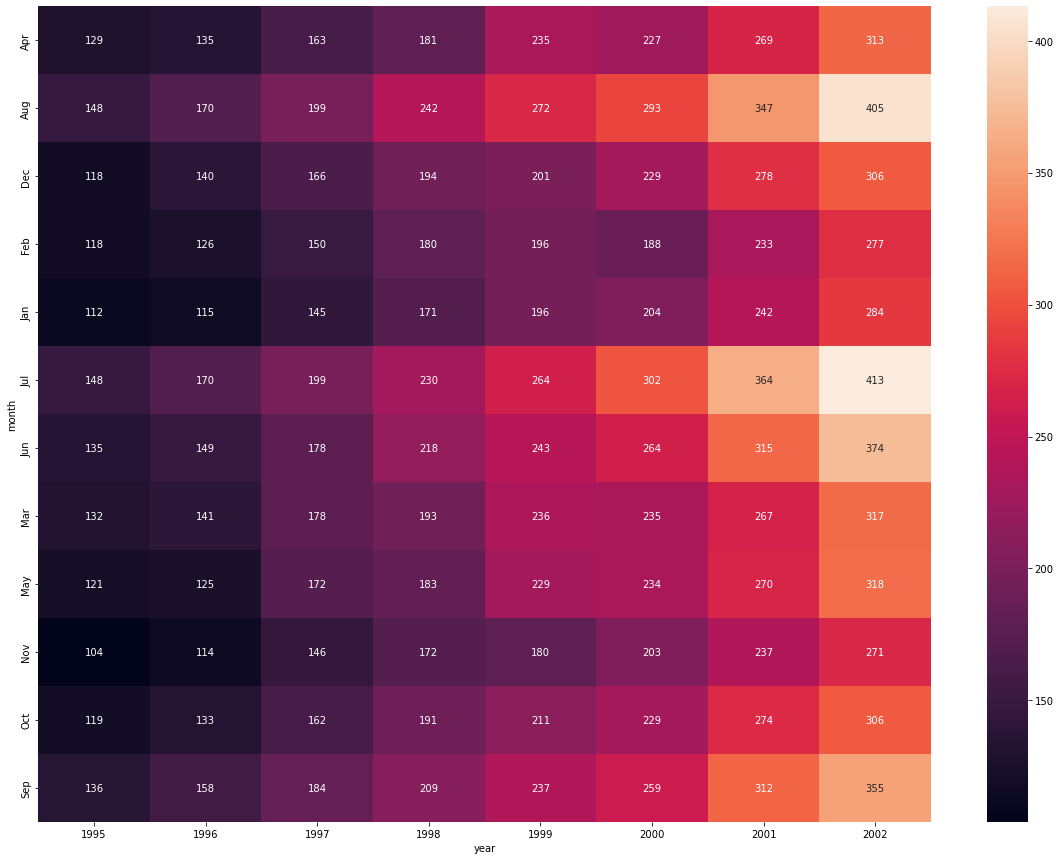

In [16]:
#creat heatmap
plt.figure(figsize=(20,15))
heatmap_y_Month = pd.pivot_table(data=air1,values="Passengers",index="month",columns="year",aggfunc="mean", fill_value = 0)
sns.heatmap(heatmap_y_Month,annot=True,fmt="g") #fmt is format of the grid values

<AxesSubplot:xlabel='month', ylabel='Passengers'>

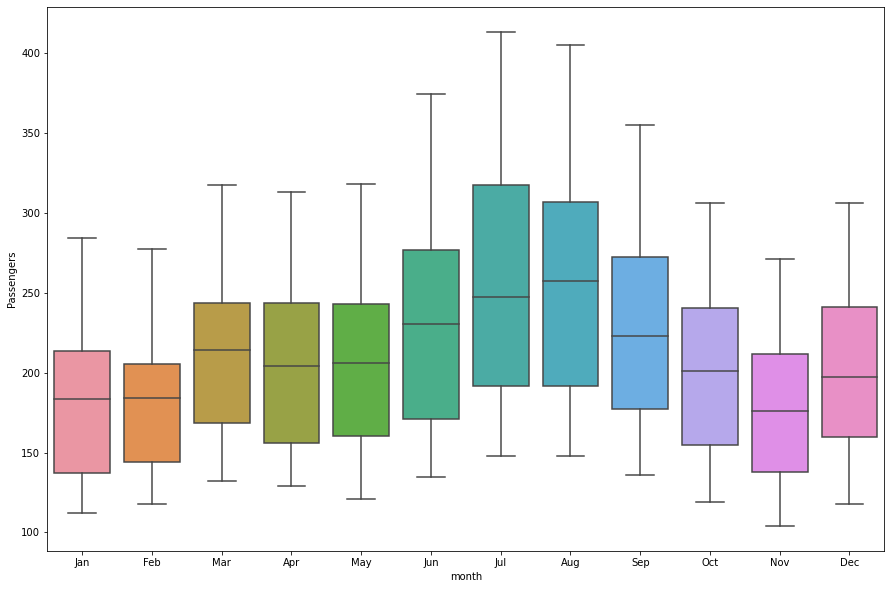

In [17]:
plt.figure(figsize=(15,10))
sns.boxplot(x="month",y="Passengers",data=air1)


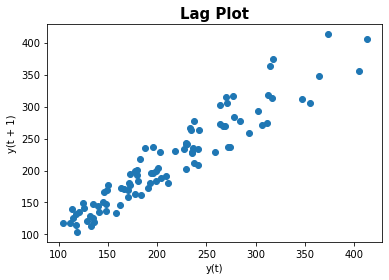

In [18]:
lag_plot(air1['Passengers'])
plt.title("Lag Plot", size = 15, weight = "bold")
plt.show()

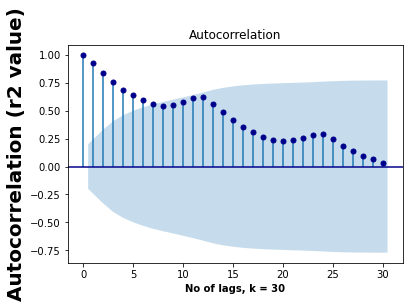

In [19]:
plot_acf(air1['Passengers'], lags = 30, color = 'darkblue')               # lags = 30 means it will plot for k = 30 lags 
plt.xlabel("No of lags, k = 30", size = 10, weight = 'bold')
plt.ylabel("Autocorrelation (r2 value)", size = 20, weight = 'bold')
plt.show()

<AxesSubplot:xlabel='year', ylabel='Passengers'>

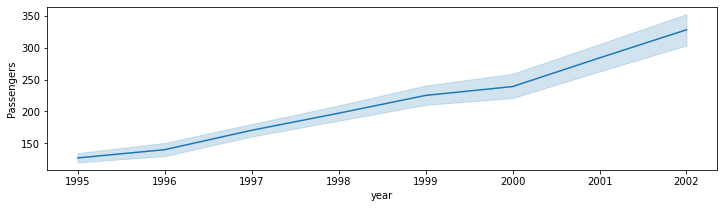

In [20]:
plt.figure(figsize=(12,3))
sns.lineplot(x="year",y="Passengers",data=air1)

In [21]:

train =air1.head(80)
test  =air1.tail(10)

In [22]:
import statsmodels.formula.api as smf 

In [23]:
#linear model

linear = smf.ols('Passengers~t',data=train).fit()
pred_linear =  pd.Series(linear.predict(pd.DataFrame(test['t'])))
rmse_linear = np.sqrt(np.mean((np.array(test['Passengers'])-np.array(pred_linear))**2))
rmse_linear

56.89619040761137

In [24]:
#quadratic model

Quad = smf.ols('Passengers~t+t_squared',data=train).fit() #quadratic model
pred_Quad = pd.Series(Quad.predict(test[["t","t_squared"]]))
rmse_Quad = np.sqrt(np.mean((np.array(test['Passengers'])-np.array(pred_Quad))**2))
print("Root Mean Square Error : ",rmse_Quad)

Root Mean Square Error :  48.32410942564412


In [25]:
#exponential model

Exp = smf.ols('log_Passengers~t',data=train).fit() #exponential model
pred_Exp = pd.Series(Exp.predict(pd.DataFrame(test['t'])))
rmse_Exp = np.sqrt(np.mean((np.array(test['Passengers'])-np.array(np.exp(pred_Exp)))**2))
print("Root Mean Square Error : ",rmse_Exp)

Root Mean Square Error :  48.29609288993696


In [29]:
#additive seasonality

add_sea = smf.ols('Passengers~Apr+Aug+Dec+Feb+Jan+Jul+Jun+Mar+May+Nov+Oct+Sep',data=train).fit() #additive seasonality model
pred_add_sea = pd.Series(add_sea.predict(test[['Apr','Aug','Dec','Feb','Jan','Jul','Jun','Mar','May','Nov','Oct','Sep']]))
rmse_add_sea = np.sqrt(np.mean((np.array(test['Passengers'])-np.array(pred_add_sea))**2))
print("Root Mean Square Error : ",rmse_add_sea)

Root Mean Square Error :  142.09860661620706


In [31]:
#additive seasonality with linear treand

add_sea_quad = smf.ols('Passengers~t+t_squared+Apr+Aug+Dec+Feb+Jan+Jul+Jun+Mar+May+Nov+Oct+Sep',data=train).fit() #additive seasonality qudratic model
pred_add_sea_quad = pd.Series(add_sea_quad.predict(test[['t','t_squared','Apr','Aug','Dec','Feb','Jan','Jul','Jun','Mar','May','Nov','Oct','Sep']]))
rmse_add_sea_quad = np.sqrt(np.mean((np.array(test['Passengers'])-np.array(pred_add_sea_quad))**2))
print("Root Mean Square Error : ",rmse_add_sea_quad)

Root Mean Square Error :  29.277663130732595


In [32]:
#additive seasonality with quadratic trend

add_sea_quad = smf.ols('Passengers~t+t_squared+Apr+Aug+Dec+Feb+Jan+Jul+Jun+Mar+May+Nov+Oct+Sep',data=train).fit() #additive seasonality qudratic model
pred_add_sea_quad = pd.Series(add_sea_quad.predict(test[['t','t_squared','Apr','Aug','Dec','Feb','Jan','Jul','Jun','Mar','May','Nov','Oct','Sep']]))
rmse_add_sea_quad = np.sqrt(np.mean((np.array(test['Passengers'])-np.array(pred_add_sea_quad))**2))
print("Root Mean Square Error : ",rmse_add_sea_quad)

Root Mean Square Error :  29.277663130732595


In [34]:
#multiplicative seasonality

Mul_sea = smf.ols('log_Passengers~t+t_squared+Apr+Aug+Dec+Feb+Jan+Jul+Jun+Mar+May+Nov+Oct+Sep',data = train).fit() #multiplicative seasonality model
pred_Mult_sea = pd.Series(Mul_sea.predict(test))
rmse_Mult_sea = np.sqrt(np.mean((np.array(test['Passengers'])-np.array(np.exp(pred_Mult_sea)))**2))
print("Root Mean Square Error : ",rmse_Mult_sea)

Root Mean Square Error :  27.196834715361668


In [35]:
#multiplicative additive seasonality

Mul_Add_sea = smf.ols('log_Passengers~t++Apr+Aug+Dec+Feb+Jan+Jul+Jun+Mar+May+Nov+Oct+Sep',data = train).fit() #multiplicative additive seasonality
pred_Mult_add_sea = pd.Series(Mul_Add_sea.predict(test))
rmse_Mult_add_sea = np.sqrt(np.mean((np.array(test['Passengers'])-np.array(np.exp(pred_Mult_add_sea)))**2))
print("Root Mean Square Error : ",rmse_Mult_add_sea) 

Root Mean Square Error :  11.4104267101392


In [36]:
#tabuling rmes value
Final_data = {"MODEL":pd.Series(["rmse_linear","rmse_Exp","rmse_Quad","rmse_add_sea","rmse_add_sea_quad","rmse_Mult_sea","rmse_Mult_add_sea"]),"RMSE_Values":pd.Series([rmse_linear,rmse_Exp,rmse_Quad,rmse_add_sea,rmse_add_sea_quad,rmse_Mult_sea,rmse_Mult_add_sea])}
Final_result = pd.DataFrame(Final_data) #data frame of final result
Final_result.sort_values(['RMSE_Values'])

,MODEL,RMSE_Values
6,rmse_Mult_add_sea,11.410427
5,rmse_Mult_sea,27.196835
4,rmse_add_sea_quad,29.277663
1,rmse_Exp,48.296093
2,rmse_Quad,48.324109
0,rmse_linear,56.896190
3,rmse_add_sea,142.098607


In [38]:
air4 = pd.read_excel('E:DATA SETS/Airlines+Data.xlsx')

In [39]:
air4

,Month,Passengers
0,1995-01-01,112
1,1995-02-01,118
2,1995-03-01,132
3,1995-04-01,129
4,1995-05-01,121
...,...,...
91,2002-08-01,405
92,2002-09-01,355
93,2002-10-01,306
94,2002-11-01,271


In [40]:
#final model with least rmse value
Final_pred = smf.ols('Passengers~Apr+Aug+Dec+Feb+Jan+Jul+Jun+Mar+May+Nov+Oct+Sep',data=train).fit()

In [43]:
pred_new  = pd.Series(Final_pred.predict(air1))

In [44]:
pred_new

0     169.285714
1     170.142857
2     197.428571
3     191.285714
4     190.571429
         ...    
91    238.714286
92    197.166667
93    174.166667
94    153.166667
95    174.666667
Length: 96, dtype: float64